In [207]:
import re
import numpy as np
import pandas as pd
import requests,time
import datetime
from scipy import stats
import csv
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import json
import webbrowser
import warnings
import PyPDF2
import io
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from contextlib import suppress


The following 3 cells are used for scarpping the data from the Loksabha site. as the spreadsheets they were giving were not matching with the records shown on the website.

In [1]:
import re
import numpy as np
import pandas as pd
import requests,time
import datetime
from scipy import stats
import csv
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import json
import webbrowser
import warnings
import PyPDF2
import io
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


The following 3 cells are used for scarpping the data from the Loksabha site. as the spreadsheets they were giving were not matching with the records shown on the website.

In [ ]:

# ! will open these following urls on the browser

websites = ['https://sansad.in/api_ls/question/qetFilteredQuestionsAns?loksabhaNo=16&sessionNumber=2&pageNo=1&locale=en&pageSize=5877','https://sansad.in/ls/questions/questions-and-answers','https://loksabha.nic.in/writereaddata/our%20parliament/Question%20Hour%20in%20Lok%20sabha.pdf','https://shivsamshankars.medium.com/how-to-get-a-question-selected-in-the-indian-parliament-rigged-system-or-just-a-flawed-one-8e9de683e126']
for i in range(len(websites)):
    webbrowser.open(websites[i])

In [ ]:

# ! no need to run this cell
s = HTMLSession()

def get_recordsize(lok_sabha,session_no,page_no):
    """_Get the data for LS, fetch data from the url_

    Args:
        

    Returns:
        _list_: _json_or_dictionary_
    """    ''''''
    lok_sabha = lok_sabha
    session_no = session_no
    page_no = page_no

    url = f'https://sansad.in/api_ls/question/qetFilteredQuestionsAns?loksabhaNo={lok_sabha}&sessionNumber={session_no}&pageNo=1&locale=en&pageSize='
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    list = soup.text.strip().replace('null',""'null'"")
    list1 = json.loads(list)
    record_size =list1[0]['totalRecordSize']

    url   = f'https://sansad.in/api_ls/question/qetFilteredQuestionsAns?loksabhaNo={lok_sabha}&sessionNumber={session_no}&pageNo=1&locale=en&pageSize={record_size}' 
    page  = requests.get(url)
    soup2 = BeautifulSoup(page.text, 'html')
    list2f  = soup2.text.strip().replace('null',""'null'"")
    list2f = json.loads(list2f)
    return list2f


In [ ]:

# ! Do not run this cell

def get_df(lok_sabha,session_no,page_no):
    """_return a list of data_frames_

    Args:
        lok_sabha (_int_): _takes_the_lok_Sabha_ no._
        session_no (_int_): _Sessionnumber_LS16_has_no_1stsession_
        page_no (_int_): _keep_it_one_

    Returns:
        _list_: _containing dataframes_
    """    """"""
    df = pd.DataFrame.from_dict(get_recordsize(lok_sabha,session_no,page_no)[0]['listOfQuestions'])
    return df
ls16_session_wise = [get_df(16,sess,1) for sess in range(2,18)]
ls17_session_wise = [get_df(17,sess,1) for sess in range(1,13)]
# * runtime_was = 14m 58.5s
#--------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# ! do not run this cell
# ? This is the cell that takes 

# num = 1  # data has been created already
# for df in ls16_session_wise:
#     num += 1
#     df.to_json(f'16session{num}.json', orient = 'records', compression = 'infer')

# num_ = 0
# for df in ls17_session_wise:
#     num_ += 1
#     df.to_json(f'17session{num_}.json', orient = 'records', compression = 'infer')

#### From here
    The data has been already downloaded in json format
    You choose the data range in the below cell, you want to do the analysis for

In [2]:
ls16_sess = [(pd.read_json(f'16session{i}.json', convert_dates=False)) for i in range(2,18)]
ls17_sess = [(pd.read_json(f'17session{i}.json', convert_dates=False)) for i in range(1,13)]

ls_sess = [*ls16_sess ,*ls17_sess]

# * appending all the sessions to the one dataframe
concatdf = pd.concat(ls_sess, ignore_index=True) # ? only 6 sessions rn

# ? cleaning the data for member names and dates 
# *  Date formatting 
concatdf['date'] = concatdf['date'].str.replace('.','')
concatdf['date'] = (concatdf['date'].str[-4:]+ concatdf['date'].str[2:4] + concatdf['date'].str[:2]).apply(int)  # ? date formating
# *  Member name formatting
concatdf['memberstring'] = [','.join(map(str, l)) for l in concatdf['member']] # ? cleaning the data for member
fourth_column = concatdf.pop('memberstring')
concatdf.insert(4,'memberstring',fourth_column)
concatdf["memberstring"].str.strip()

concatdf["type"].str.strip()
# * _________________________________________________________________________
# ? Choose a range of dates 
start_date = 20140707
end_date =  20160303


# concatdf.sort_values(by = 'date')


# * total dates, subjects unique ________________________________________________________________
subjects_unique = concatdf['subjects']
subjects_unique.unique()
print(len(subjects_unique.unique()))
print(len(subjects_unique))
session_dates = concatdf['date']
len(session_dates.unique())

#concatdf
concatdf['questionText'] = concatdf.questionText.str.replace("\n\r\n","")
concatdf = concatdf.query(f'date >= {start_date}  & date <= {end_date}') # 20140707 to 20230811

concatdf = concatdf.sort_values(by = 'date', ignore_index= True)


108948
134866


In [ ]:
idx_first_empty_row = concatdf.iloc[:, 9].isna()
blank_row_index =  [i for i, x in enumerate(idx_first_empty_row) if x][0]
blank_row_index
idx_first_empty_row #= concatdf.iloc[19095:20000,:]


concatdf.questionText.str.replace("\n\r\n","")
concatdf['questionText'] = concatdf.questionText.str.replace("\n\r\n","")



#concatdf[19096:19105]
blank_row_index

19098

In [ ]:
 # 23506

sample_df = concatdf[19097:19108]





def pdf_indexes(dataframe):
    '''returns indexes of dataframe for column questionsFilePath, links which are pdf files'''
    
    alltr_indexes = []
    allfa_indexes = []

    for i in range(19097,dataframe.index[-1]):
        val = dataframe.questionsFilePath[i]
        if 'pdf' in val:
            alltr_indexes.append(i)
        else:
            allfa_indexes.append(i)

    return alltr_indexes, allfa_indexes

indlist = pdf_indexes(sample_df)[0]



word cloud for the all the starred and unstarred qurstions

1. Do for only starred
2. For only unstarred 


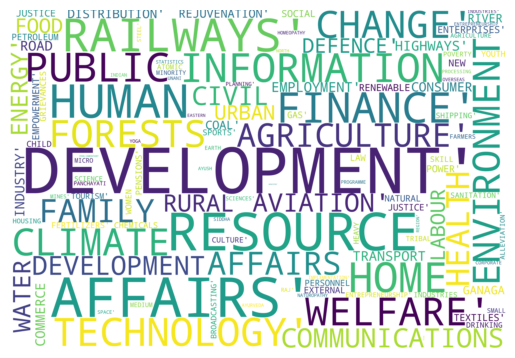

In [ ]:
#Total number of rows are 134866 and 

def subjects_uniqueliststr(dataframe):
    subjects_unique = dataframe['ministry']
    subjects_unique_list =  list(subjects_unique)
    subjects_unique_liststr = str(subjects_unique_list)
    subjects_unique_liststr[0:].replace("'","").replace("[","").replace("]","").replace(" '","").replace("' ","")
    return subjects_unique_liststr

text1 = subjects_uniqueliststr(concatdf)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 3048, height = 2080).generate(text1)
#word_cloud1.to_file('sampledf.png')


# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


Questions, being scraped from the individual pdfs and being pasted to the dataframe in the questionText column  index starts from 19098

In [ ]:
def ministry_frequency(dataframe):
    ministry_unique = dataframe['ministry']
    ministry_unique = pd.DataFrame(dataframe['ministry'].value_counts())
    ministry_unique['proportion%'] = ((dataframe['ministry'].value_counts())/dataframe['ministry'].shape[0])*100
    ministry_unique.loc['Column_Total']= ministry_unique.sum(numeric_only=True, axis=0)
    ministry_unique.reset_index(inplace=True)
    return ministry_unique

mdf = ministry_frequency(concatdf)

In [ ]:

# ! Question appending function
# ! this works for the pdf



def scrape_pdf_and_questions(dataframe):

   #if "pdf" in url:
  indices = pdf_indexes(dataframe)[0]
  for ind in indices:                               # ? could just making a list of strings and pasting them sideways be faster
    url = dataframe.questionsFilePath[ind]
    if "https://" in url:
      r = requests.get(url)
      f = io.BytesIO(r.content)
      reader = PyPDF2.PdfReader(f)
      contents = reader.pages[0].extract_text().split('\n')
      string_contents = str(contents)
      dataframe.loc[ind,'questionText'] = string_contents
      #have to do something with regualar_expressions
    
      #listn = [','.join(map(str, l)) for l in contents]
    
scrape_pdf_and_questions(sample_df)


In [ ]:
#scrape_pdf_and_questions(sample_df)
sample_df


quesNo                                      subjects  lokNo  \
19097    6974                     TAX EVASION BY COMPANIES      16   
19098     171          Pollution of Ganga and Yamuna Rivers     16   
19099     170                            Suicide by Farmers     16   
19100     169                             Use of Pesticides     16   
19101     168                              Onion Production     16   
19102     167        Sowing areas under Pulses and Oilseeds     16   
19103     164  Establishing Heavy Industries in the Country     16   
19104     165                                    Price Rise     16   
19105     163              Impact of Monsoon on Agriculture     16   
19106     162          Decline in Procurement of Foodgrains     16   
19107     161          Schemes for Youth Affairs and Sports     16   

                                                  member  \
19097  [RAVINDRA BABU  PANDULA, ARVIND GANPAT SAWANT,...   
19098  [VINAYAK BHAURAO RAUT, SHRIKANT EKNATH SHINDE,...   
19099  [RAMA KISHORE SINGH, RAGHAV LAKHANPAL, SHARAD ...   
19100  [ARKA KESHARI DEO, P.K.SREEMATHI TEACHER, NAGA...   
19101  [MEENAKASHI LEKHI, M. UDHAYAKUMAR, T. RADHAKRI...   
19102  [DHANANJAY BHIMRAO MAHADIK, M. UDHAYAKUMAR, T....   
19103                                 [NISHIKANT  DUBEY]   
19104  [R.K. BHARATHI MOHAN, BOORA NARSAIAH GOUD, BHE...   
19105  [C. N. JAYADEVAN, BOORA NARSAIAH GOUD, CHANDRA...   
19106                  [SIRAJUDDIN AJMAL, RAVNEET SINGH]   
19107  [HARISH DWIVEDI, SANTOSH AHLAWAT, SHIVKUMAR CH...   

                                            memberstring  \
19097  RAVINDRA BABU  PANDULA,ARVIND GANPAT SAWANT,KR...   
19098  VINAYAK BHAURAO RAUT,SHRIKANT EKNATH SHINDE,RA...   
19099  RAMA KISHORE SINGH,RAGHAV LAKHANPAL,SHARAD TRI...   
19100  ARKA KESHARI DEO,P.K.SREEMATHI TEACHER,NAGARAJ...   
19101  MEENAKASHI LEKHI,M. UDHAYAKUMAR,T. RADHAKRISHN...   
19102  DHANANJAY BHIMRAO MAHADIK,M. UDHAYAKUMAR,T. RA...   
19103                                   NISHIKANT  DUBEY   
19104  R.K. BHARATHI MOHAN,BOORA NARSAIAH GOUD,BHEEMR...   
19105  C. N. JAYADEVAN,BOORA NARSAIAH GOUD,CHANDRA PR...   
19106                     SIRAJUDDIN AJMAL,RAVNEET SINGH   
19107  HARISH DWIVEDI,SANTOSH AHLAWAT,SHIVKUMAR CHANA...   

                                             ministry        type      date  \
19097                                         FINANCE  UNSTARRED   20150508   
19098        ENVIRONMENT,  FORESTS AND CLIMATE CHANGE  UNSTARRED   20150721   
19099                                     AGRICULTURE  UNSTARRED   20150721   
19100                                     AGRICULTURE  UNSTARRED   20150721   
19101                                     AGRICULTURE  UNSTARRED   20150721   
19102                                     AGRICULTURE  UNSTARRED   20150721   
19103         HEAVY INDUSTRIES AND PUBLIC ENTERPRISES  UNSTARRED   20150721   
19104  CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION  UNSTARRED   20150721   
19105                                     AGRICULTURE  UNSTARRED   20150721   
19106  CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION  UNSTARRED   20150721   
19107                        YOUTH AFFAIRS AND SPORTS  UNSTARRED   20150721   

                                            questionText  \
19097  (a) Whether some companies, particularly in th...   
19098  ['GOVERNMENT OF INDIA  ', 'MINISTRY OF ENVIRON...   
19099                                                NaN   
19100                                                NaN   
19101                                                NaN   
19102                                                NaN   
19103                                                NaN   
19104                                                NaN   
19105                                                NaN   
19106  [' ', 'GOVERNMENT OF INDIA  ', 'MINISTRY OF CO...   
19107                                                NaN   

                                              answerTe

In [ ]:
sample_df.questionsFilePath[19099]


'https://sansad.in/getFile/loksabhaquestions/annex/5/AU170.doc?source=pqals'

In [ ]:
concatdf

In [3]:

def combined_questions_members(sub1):
    """_returns a copy of a df only containing the questions which are a club of more than one people_

    Args:
        sub1 (_pandas.Dataframe_): _lok sabha data frame_

    Returns:
        _pandas_: _pandas Dataframe_
    """    ''''''    
    distnames = sub1['member']
    distnames = pd.DataFrame(distnames)

    list_more_1 = [pd.DataFrame(distnames.loc[ind]) for ind in distnames.index if len(distnames['member'][ind]) > 1]
    list_more_1 = [list_more_1[ind].transpose() for ind in range(len(list_more_1))]
    more_than_1 = pd.concat(list_more_1, ignore_index = False) if len(list_more_1) > 0 else pd.DataFrame(columns= concatdf.columns.values)
    full_col_more1 = [ind for ind in more_than_1.index]
    full_col_more_than_1mem = concatdf.loc[full_col_more1,:]
    return full_col_more_than_1mem

combined_questions_members(concatdf)
lok_sabha_members = [concatdf.loc[i,'member'][0] for i in concatdf.index]


for i in combined_questions_members(concatdf).index:
    for j in range(len(concatdf.loc[i,'member'])):
        lok_sabha_members.append(concatdf.loc[i,'member'][j])
    
len(lok_sabha_members)
# # ! the number of people that have questioned

lok_sabha_members = list(set(lok_sabha_members))
len(lok_sabha_members)

462

In [ ]:

# ? this is an example of how we will save the DataFrames in a folder named Sheets in excel format
name = concatdf.loc[concatdf['memberstring'].str.contains("TAPAS PAUL",case = False)]
name.type.value_counts()

type
UNSTARRED     5
Name: count, dtype: int64

In [ ]:
# date = '20140814'

# sub1 = concatdf.query(f'type == "STARRED   " and date == "{date}"') # ! three spaces after STARRED
# sub3 = concatdf.loc[concatdf['memberstring'].str.contains("BALABHADRA MAJHI",case = False)]
# sub4 = sub3.query('type == "STARRED   "')

# sb3 = sub2.query(f'type == "STARRED   "')


# sb3.index


def get_star_unstar_tot_club(member_name,data_frame):

    
    warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups.To actually get the groups, use str.extract.')
    member_name = member_name
    #warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.')
    the_name = data_frame.loc[data_frame['memberstring'].str.contains(member_name,case = False)]
    clubbed_list = []

    for i in combined_questions_members(the_name).index:
        for j in range(len(the_name.loc[i,'member'])):
            clubbed_list.append(the_name.loc[i,'member'][j])
    club_count = clubbed_list.count(f'{member_name}') -1 # beacuase it is counting single name also a 


    unstarred = 0 if len(the_name.type.value_counts()) < 1 else the_name.type.value_counts().iloc[0]
    starred   = 0 if len(the_name.type.value_counts()) < 2 else the_name.type.value_counts().iloc[1] 
    dictionary_name_ques = {'MemberName' :f'{member_name}',
                            'Total_Questions' : unstarred+starred,
                            'Clubbed': club_count,
                            'Unstarred': unstarred,
                            'Starred' : starred,
                            '% Starred' : 1+starred/(1+unstarred+starred) -1

    }
    return dictionary_name_ques




# ****************************************************************








# def club_star_unstar(member_name,dataframe):
data = []
for member_name in lok_sabha_members:
    data.append(get_star_unstar_tot_club(member_name,concatdf))
comparison_df = pd.DataFrame.from_dict(data)
comparison_df.MemberName = comparison_df.MemberName.replace(r'\s+', ' ', regex=True)




In [199]:
dfforstate = comparison_df.sort_values(by = "Starred", ascending = False, ignore_index= True)[:30]
dfforstate

MemberName  Total_Questions  Clubbed  Unstarred  \
0                 DHARMENDRA YADAV              428      413        386   
1            SUPRIYA SADANAND SULE              483      453        444   
2                  NISHIKANT DUBEY              339      216        303   
3          RAJEEV SHANKARRAO SATAV              434      423        401   
4        DHANANJAY BHIMRAO MAHADIK              465      461        433   
5                 ASADUDDIN OWAISI              400      229        369   
6          VINOD KUMAR BOIANAPALLI              266      175        235   
7   JYOTIRADITYA MADHAVRAO SCINDIA              364      296        334   
8               BHARTRUHARI MAHTAB              236      210        206   
9           VIJAYSINH MOHITE PATIL              451      448        423   
10                  ANANDRAO ADSUL              417      397        389   
11          HEENA VIJAYKUMAR GAVIT              394      390        366   
12          SHIVAJI ADHALRAO PATIL              476      447        448   
13         ASHOK SHANKARRAO CHAVAN              355      344        328   
14           SANJAY SHAMRAO DHOTRE              218      204        192   
15               SURESH KODIKUNNIL              336      201        310   
16               ARJUN RAM MEGHWAL              304      179        278   
17           BAIJAYANT "JAY" PANDA              278      143        253   
18                    NAGARAJAN P.              261      181        236   
19                   RAVNEET SINGH              285      184        261   
20      KALIKESH NARAYAN SINGH DEO              285      218        261   
21             RAM TAHAL CHOUDHARY              264      230        240   
22                     SAUGATA ROY              262      135        239   
23          NAGENDRA KUMAR PRADHAN              380      290        357   
24                  VIRENDRA KUMAR              207      134        184   
25                   MAHEISH GIRRI              222      139        199   
26                     BHOLA SINGH              183       62        161   
27      PRATAPRAO GANPATRAO JADHAV              245      215        223   
28            ARVIND GANPAT SAWANT              162      143        140   
29          KUNWAR HARIBANSH SINGH              337      328        315   

    Starred  % Starred  
0        42   0.097902  
1        39   0.080579  
2        36   0.105882  
3        33   0.075862  
4        32   0.068670  
5        31   0.077307  
6        31   0.116105  
7        30   0.082192  
8        30   0.126582  
9        28   0.061947  
10       28   0.066986  
11       28   0.070886  
12       28   0.058700  
13       27   0.075843  
14       26   0.118721  
15       26   0.077151  
16       26   0.085246  
17       25   0.089606  
18       25   0.095420  
19       24   0.083916  
20       24   0.083916  
21       24   0.090566  
22       23   0.087452  
23       23   0.060367  
24       23   0.110577  
25       23   0.103139  
26       22   0.119565  
27       22   0.089431  
28       22   0.134969  
29       22   0.065089

In [200]:
les16mem = pd.read_excel("LS16MEMSTATE.xlsx")
les16mem
les17mem = pd.read_excel("LS17MEMSTATE.xlsx")
les16mem

Name of Member                                Party Name  \
0       Dr. Farooq Abdullah     Jammu and Kashmir National Conference   
1    Shivaji Adhalrao Patil                                 Shiv Sena   
2     Deepak (Dev) Adhikari              All India Trinamool Congress   
3         Dibyendu Adhikari              All India Trinamool Congress   
4      Sisir Kumar Adhikari              All India Trinamool Congress   
..                      ...                                       ...   
568            Dimple Yadav                           Samajwadi Party   
569       B. S. Yeddyurappa                    Bharatiya Janata Party   
570          Nandi Yellaiah                  Indian National Congress   
571        Tokheho Yepthomi  Nationalist Democratic Progressive Party   
572         Chand Nath Yogi                    Bharatiya Janata Party   

                 State           Constituency & State MemberShip Status  \
0    Jammu and Kashmir  Srinagar  (Jammu and Kashmir)           Sitting   
1          Maharashtra          Shirur  (Maharashtra)            Former   
2          West Bengal          Ghatal  (West Bengal)           Sitting   
3          West Bengal          Tamluk  (West Bengal)           Sitting   
4          West Bengal          Kanthi  (West Bengal)           Sitting   
..                 ...                            ...               ...   
568      Uttar Pradesh      Mainpuri  (Uttar Pradesh)           Sitting   
569          Karnataka           Shimoga  (Karnataka)          Resigned   
570          Telangana  Nagarkurnool (SC) (Telangana)            Former   
571           Nagaland           Nagaland  (Nagaland)           Sitting   
572          Rajasthan             Alwar  (Rajasthan)              Died   

    Lok Sabha Terms  
0        7,15,16,17  
1          14,15,16  
2             16,17  
3             16,17  
4          15,16,17  
..              ...  
568        15,16,17  
569              16  
570  6,7,9,10,11,16  
571           16,17  
572              16  

[573 rows x 6 columns]

In [ ]:
the_name = concatdf.loc[concatdf['memberstring'].str.contains("",case = False)]
lok_sabha_membersvn = []
# for i in combined_questions_members(the_name).index:
#     for j in range(len(the_name.loc[i,'member'])):
#         lok_sabha_membersvn.append(the_name.loc[i,'member'][j])
# set(lok_sabha_membersvn)
#combined_questions_members(the_name)
the_name

In [ ]:
the_n = concatdf.loc[concatdf['memberstring'].str.contains("SUPRIYA SADANAND SULE",case = False)]
lok_sabha_membersvn = []
dataf = combined_questions_members(the_n)
for i in dataf.index:
    for j in range(len(the_name.loc[i,'member'])):
        lok_sabha_membersvn.append(the_name.loc[i,'member'][j])
    
unq = set(lok_sabha_membersvn)
# for i in unq:

#     print(f"{i}" +"  " + str(list(set(lok_sabha_membersvn)).count(i)))

# the_n = the_n.loc[the_n['memberstring'].str.contains("DHANANJAY BHIMRAO MAHADIK", case = False)]
# the_n
the_n = the_n.loc[the_n.memberstring.str.contains("VIJAYSINH MOHITE PATIL", case = False)]
the_n = the_n.loc[the_n["member"].apply(len) == 6]
the_n = the_n.loc[the_n.memberstring.str.contains("DHANANJAY BHIMRAO MAHADIK", case = False)]
the_n.shape



In [ ]:
the_name = concatdf.loc[concatdf['memberstring'].str.contains("SUPRIYA SADANAND SULE",case = False)]
lok_sabha_membersvn = []
for i in combined_questions_members(the_name).index:
    for j in range(len(the_name.loc[i,'member'])):
        lok_sabha_membersvn.append(the_name.loc[i,'member'][j])
    
unq = set(lok_sabha_membersvn)
club_members = []
for i in unq:
    club_mem = {f"SUPRIYA SADANAND SULE": i,
                "Questions_clubbed": lok_sabha_membersvn.count(i)            
    }
    club_members.append(club_mem)

club_members   = pd.DataFrame.from_dict(club_members)
club_members.sort_values(by = "Questions_clubbed", ascending = False)[:40]

SUPRIYA SADANAND SULE  Questions_clubbed
113           SUPRIYA SADANAND SULE                454
151       DHANANJAY BHIMRAO MAHADIK                357
145          VIJAYSINH MOHITE PATIL                351
297         RAJEEV SHANKARRAO SATAV                324
110          HEENA VIJAYKUMAR GAVIT                312
120                T. RADHAKRISHNAN                184
220           JAYAKUMAR JAYAVARDHAN                 69
126         ASHOK SHANKARRAO CHAVAN                 34
258          KUNWAR HARIBANSH SINGH                 32
129                   SUDHEER GUPTA                 31
24     GAJANAN CHANDRAKANT KIRTIKAR                 30
22           SHRIKANT EKNATH SHINDE                 27
32             RAHUL RAMESH SHEWALE                 26
125            VINAYAK BHAURAO RAUT                 25
281           SUNIL BALIRAM GAIKWAD                 24
170                 ANANDRAO  ADSUL                 21
1    JYOTIRADITYA MADHAVRAO SCINDIA                 20
154                DHARMENDRA YADAV                 20
52           SHIVAJI ADHALRAO PATIL                 20
28                 ASADUDDIN OWAISI                 19
265         VINOD KUMAR BOIANAPALLI                 19
105             Shrirang Appa Barne                 18
230              A. ARUNMOZHITHEVAN                 17
211                    NAGARAJAN P.                 17
212          NAGENDRA KUMAR PRADHAN                 17
242                 C. N. JAYADEVAN                 17
56                DUSHYANT CHAUTALA                 16
280        RAMACHANDRAN MULLAPPALLY                 16
249                  M. UDHAYAKUMAR                 15
36              T.G. VENKATESH BABU                 14
72                    P.R. SUNDARAM                 14
131       RANGASWAMY DHRUVANARAYANA                 13
152               SURESH KODIKUNNIL                 12
268      KALIKESH NARAYAN SINGH DEO                 12
291        GOPALAKRISHNAN CHINNARAJ                 12
76                    K. MARAGATHAM                 12
81            RAVINDRA KUMAR PANDEY                 12
295                 SANTOSH AHLAWAT                 12
119             BIDYUT BARAN MAHATO                 11
122            DALPAT SINGH PARASTE                 11

In [ ]:
v = pd.read_json("16session2.json")
v[1000:].to_dict("records")

[{'quesNo': 4437,
  'subjects': 'SHARE OF STATES IN CSS ',
  'lokNo': 16,
  'member': ['KRISTAPPA NIMMALA'],
  'ministry': 'FINANCE',
  'type': 'UNSTARRED ',
  'date': Timestamp('2014-08-08 00:00:00'),
  'questionText': '\n\r\n(a)  whether the Government has urged the State Governments to maintain their share in the \r\nCentrally Sponsored Scheme (CSS) so as to ensure that the budget outlay of the schemes stay \r\nwithin the outlay approved by the Planning Commission;\r\n\r\n(b)  if so. the details thereof and the action taken thereon State-wise;\r\n\r\n(c)  the details of the step taken by the Government to ensure better coordination amongst \r\nvarious Ministries for optimum utilization of resources and avoidance of overlapping of work;\r\n\r\n(d)  whether instructions have been issued for strict compliance of the guidelines with regard \r\nto the ongoing CSS during the 12th Five Year Plan and identification of schemes which can be \r\nmerged/ subsumed so as to avoid needless expendi

In [ ]:

# ! will open these following urls on the browser

websites = ['https://sansad.in/api_ls/question/qetFilteredQuestionsAns?loksabhaNo=16&sessionNumber=2&pageNo=1&locale=en&pageSize=5877','https://sansad.in/ls/questions/questions-and-answers','https://loksabha.nic.in/writereaddata/our%20parliament/Question%20Hour%20in%20Lok%20sabha.pdf','https://shivsamshankars.medium.com/how-to-get-a-question-selected-in-the-indian-parliament-rigged-system-or-just-a-flawed-one-8e9de683e126']
for i in range(len(websites)):
    webbrowser.open(websites[i])

In [ ]:

# ! no need to run this cell
s = HTMLSession()

def get_recordsize(lok_sabha,session_no,page_no):
    """_Get the data for LS, fetch data from the url_

    Args:
        

    Returns:
        _list_: _json_or_dictionary_
    """    ''''''
    lok_sabha = lok_sabha
    session_no = session_no
    page_no = page_no

    url = f'https://sansad.in/api_ls/question/qetFilteredQuestionsAns?loksabhaNo={lok_sabha}&sessionNumber={session_no}&pageNo=1&locale=en&pageSize='
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    list = soup.text.strip().replace('null',""'null'"")
    list1 = json.loads(list)
    record_size =list1[0]['totalRecordSize']

    url   = f'https://sansad.in/api_ls/question/qetFilteredQuestionsAns?loksabhaNo={lok_sabha}&sessionNumber={session_no}&pageNo=1&locale=en&pageSize={record_size}' 
    page  = requests.get(url)
    soup2 = BeautifulSoup(page.text, 'html')
    list2f  = soup2.text.strip().replace('null',""'null'"")
    list2f = json.loads(list2f)
    return list2f


In [ ]:

# ! Do not run this cell

def get_df(lok_sabha,session_no,page_no):
    """_return a list of data_frames_

    Args:
        lok_sabha (_int_): _takes_the_lok_Sabha_ no._
        session_no (_int_): _Sessionnumber_LS16_has_no_1stsession_
        page_no (_int_): _keep_it_one_

    Returns:
        _list_: _containing dataframes_
    """    """"""
    df = pd.DataFrame.from_dict(get_recordsize(lok_sabha,session_no,page_no)[0]['listOfQuestions'])
    return df
ls16_session_wise = [get_df(16,sess,1) for sess in range(2,18)]
ls17_session_wise = [get_df(17,sess,1) for sess in range(1,13)]
# * runtime_was = 14m 58.5s
#--------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# ! do not run this cell
# ? This is the cell that takes 

# num = 1  # data has been created already
# for df in ls16_session_wise:
#     num += 1
#     df.to_json(f'16session{num}.json', orient = 'records', compression = 'infer')

# num_ = 0
# for df in ls17_session_wise:
#     num_ += 1
#     df.to_json(f'17session{num_}.json', orient = 'records', compression = 'infer')

#### From here
    The data has been already downloaded in json format
    You choose the data range in the below cell, you want to do the analysis for

In [ ]:
ls16_sess = [(pd.read_json(f'16session{i}.json', convert_dates=False)) for i in range(2,18)]
ls17_sess = [(pd.read_json(f'17session{i}.json', convert_dates=False)) for i in range(1,13)]

ls_sess = [*ls16_sess ,*ls17_sess]

# * appending all the sessions to the one dataframe
concatdf = pd.concat(ls_sess, ignore_index=True) # ? only 6 sessions rn

# ? cleaning the data for member names and dates 
# *  Date formatting 
concatdf['date'] = concatdf['date'].str.replace('.','')
concatdf['date'] = (concatdf['date'].str[-4:]+ concatdf['date'].str[2:4] + concatdf['date'].str[:2]).apply(int)  # ? date formating
# *  Member name formatting
concatdf['memberstring'] = [','.join(map(str, l)) for l in concatdf['member']] # ? cleaning the data for member
fourth_column = concatdf.pop('memberstring')
concatdf.insert(4,'memberstring',fourth_column)
concatdf["memberstring"].str.strip()

concatdf["type"].str.strip()
# * _________________________________________________________________________
# ? Choose a range of dates 
start_date = 20140707
end_date =  20160303


# concatdf.sort_values(by = 'date')


# * total dates, subjects unique ________________________________________________________________
subjects_unique = concatdf['subjects']
subjects_unique.unique()
print(len(subjects_unique.unique()))
print(len(subjects_unique))
session_dates = concatdf['date']
len(session_dates.unique())

#concatdf
concatdf['questionText'] = concatdf.questionText.str.replace("\n\r\n","")
concatdf = concatdf.query(f'date >= {start_date}  & date <= {end_date}') # 20140707 to 20230811

concatdf = concatdf.sort_values(by = 'date', ignore_index= True)


108948
134866


In [ ]:
idx_first_empty_row = concatdf.iloc[:, 9].isna()
blank_row_index =  [i for i, x in enumerate(idx_first_empty_row) if x][0]
blank_row_index
idx_first_empty_row #= concatdf.iloc[19095:20000,:]


concatdf.questionText.str.replace("\n\r\n","")
concatdf['questionText'] = concatdf.questionText.str.replace("\n\r\n","")



#concatdf[19096:19105]
blank_row_index

19098

In [ ]:
 # 23506

sample_df = concatdf[19097:19108]





def pdf_indexes(dataframe):
    '''returns indexes of dataframe for column questionsFilePath, links which are pdf files'''
    
    alltr_indexes = []
    allfa_indexes = []

    for i in range(19097,dataframe.index[-1]):
        val = dataframe.questionsFilePath[i]
        if 'pdf' in val:
            alltr_indexes.append(i)
        else:
            allfa_indexes.append(i)

    return alltr_indexes, allfa_indexes

indlist = pdf_indexes(sample_df)[0]



word cloud for the all the starred and unstarred qurstions

1. Do for only starred
2. For only unstarred 


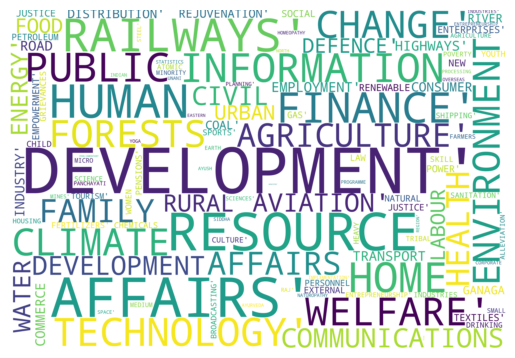

In [ ]:
#Total number of rows are 134866 and 

def subjects_uniqueliststr(dataframe):
    subjects_unique = dataframe['ministry']
    subjects_unique_list =  list(subjects_unique)
    subjects_unique_liststr = str(subjects_unique_list)
    subjects_unique_liststr[0:].replace("'","").replace("[","").replace("]","").replace(" '","").replace("' ","")
    return subjects_unique_liststr

text1 = subjects_uniqueliststr(concatdf)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 3048, height = 2080).generate(text1)
#word_cloud1.to_file('sampledf.png')


# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


Questions, being scraped from the individual pdfs and being pasted to the dataframe in the questionText column  index starts from 19098

In [ ]:
def ministry_frequency(dataframe):
    ministry_unique = dataframe['ministry']
    ministry_unique = pd.DataFrame(dataframe['ministry'].value_counts())
    ministry_unique['proportion%'] = ((dataframe['ministry'].value_counts())/dataframe['ministry'].shape[0])*100
    ministry_unique.loc['Column_Total']= ministry_unique.sum(numeric_only=True, axis=0)
    ministry_unique.reset_index(inplace=True)
    return ministry_unique

mdf = ministry_frequency(concatdf)

In [ ]:

# ! Question appending function
# ! this works for the pdf



def scrape_pdf_and_questions(dataframe):

   #if "pdf" in url:
  indices = pdf_indexes(dataframe)[0]
  for ind in indices:                               # ? could just making a list of strings and pasting them sideways be faster
    url = dataframe.questionsFilePath[ind]
    if "https://" in url:
      r = requests.get(url)
      f = io.BytesIO(r.content)
      reader = PyPDF2.PdfReader(f)
      contents = reader.pages[0].extract_text().split('\n')
      string_contents = str(contents)
      dataframe.loc[ind,'questionText'] = string_contents
      #have to do something with regualar_expressions
    
      #listn = [','.join(map(str, l)) for l in contents]
    
scrape_pdf_and_questions(sample_df)


In [ ]:
#scrape_pdf_and_questions(sample_df)
sample_df


quesNo                                      subjects  lokNo  \
19097    6974                     TAX EVASION BY COMPANIES      16   
19098     171          Pollution of Ganga and Yamuna Rivers     16   
19099     170                            Suicide by Farmers     16   
19100     169                             Use of Pesticides     16   
19101     168                              Onion Production     16   
19102     167        Sowing areas under Pulses and Oilseeds     16   
19103     164  Establishing Heavy Industries in the Country     16   
19104     165                                    Price Rise     16   
19105     163              Impact of Monsoon on Agriculture     16   
19106     162          Decline in Procurement of Foodgrains     16   
19107     161          Schemes for Youth Affairs and Sports     16   

                                                  member  \
19097  [RAVINDRA BABU  PANDULA, ARVIND GANPAT SAWANT,...   
19098  [VINAYAK BHAURAO RAUT, SHRIKANT EKNATH SHINDE,...   
19099  [RAMA KISHORE SINGH, RAGHAV LAKHANPAL, SHARAD ...   
19100  [ARKA KESHARI DEO, P.K.SREEMATHI TEACHER, NAGA...   
19101  [MEENAKASHI LEKHI, M. UDHAYAKUMAR, T. RADHAKRI...   
19102  [DHANANJAY BHIMRAO MAHADIK, M. UDHAYAKUMAR, T....   
19103                                 [NISHIKANT  DUBEY]   
19104  [R.K. BHARATHI MOHAN, BOORA NARSAIAH GOUD, BHE...   
19105  [C. N. JAYADEVAN, BOORA NARSAIAH GOUD, CHANDRA...   
19106                  [SIRAJUDDIN AJMAL, RAVNEET SINGH]   
19107  [HARISH DWIVEDI, SANTOSH AHLAWAT, SHIVKUMAR CH...   

                                            memberstring  \
19097  RAVINDRA BABU  PANDULA,ARVIND GANPAT SAWANT,KR...   
19098  VINAYAK BHAURAO RAUT,SHRIKANT EKNATH SHINDE,RA...   
19099  RAMA KISHORE SINGH,RAGHAV LAKHANPAL,SHARAD TRI...   
19100  ARKA KESHARI DEO,P.K.SREEMATHI TEACHER,NAGARAJ...   
19101  MEENAKASHI LEKHI,M. UDHAYAKUMAR,T. RADHAKRISHN...   
19102  DHANANJAY BHIMRAO MAHADIK,M. UDHAYAKUMAR,T. RA...   
19103                                   NISHIKANT  DUBEY   
19104  R.K. BHARATHI MOHAN,BOORA NARSAIAH GOUD,BHEEMR...   
19105  C. N. JAYADEVAN,BOORA NARSAIAH GOUD,CHANDRA PR...   
19106                     SIRAJUDDIN AJMAL,RAVNEET SINGH   
19107  HARISH DWIVEDI,SANTOSH AHLAWAT,SHIVKUMAR CHANA...   

                                             ministry        type      date  \
19097                                         FINANCE  UNSTARRED   20150508   
19098        ENVIRONMENT,  FORESTS AND CLIMATE CHANGE  UNSTARRED   20150721   
19099                                     AGRICULTURE  UNSTARRED   20150721   
19100                                     AGRICULTURE  UNSTARRED   20150721   
19101                                     AGRICULTURE  UNSTARRED   20150721   
19102                                     AGRICULTURE  UNSTARRED   20150721   
19103         HEAVY INDUSTRIES AND PUBLIC ENTERPRISES  UNSTARRED   20150721   
19104  CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION  UNSTARRED   20150721   
19105                                     AGRICULTURE  UNSTARRED   20150721   
19106  CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION  UNSTARRED   20150721   
19107                        YOUTH AFFAIRS AND SPORTS  UNSTARRED   20150721   

                                            questionText  \
19097  (a) Whether some companies, particularly in th...   
19098  ['GOVERNMENT OF INDIA  ', 'MINISTRY OF ENVIRON...   
19099                                                NaN   
19100                                                NaN   
19101                                                NaN   
19102                                                NaN   
19103                                                NaN   
19104                                                NaN   
19105                                                NaN   
19106  [' ', 'GOVERNMENT OF INDIA  ', 'MINISTRY OF CO...   
19107                                                NaN   

                                              answerTe

In [ ]:
sample_df.questionsFilePath[19099]


'https://sansad.in/getFile/loksabhaquestions/annex/5/AU170.doc?source=pqals'

In [ ]:
concatdf

In [ ]:

def combined_questions_members(sub1):
    """_returns a copy of a df only containing the questions which are a club of more than one people_

    Args:
        sub1 (_pandas.Dataframe_): _lok sabha data frame_

    Returns:
        _pandas_: _pandas Dataframe_
    """    ''''''    
    distnames = sub1['member']
    distnames = pd.DataFrame(distnames)

    list_more_1 = [pd.DataFrame(distnames.loc[ind]) for ind in distnames.index if len(distnames['member'][ind]) > 1]
    list_more_1 = [list_more_1[ind].transpose() for ind in range(len(list_more_1))]
    more_than_1 = pd.concat(list_more_1, ignore_index = False) if len(list_more_1) > 0 else pd.DataFrame(columns= concatdf.columns.values)
    full_col_more1 = [ind for ind in more_than_1.index]
    full_col_more_than_1mem = concatdf.loc[full_col_more1,:]
    return full_col_more_than_1mem

combined_questions_members(concatdf)
lok_sabha_members = [concatdf.loc[i,'member'][0] for i in concatdf.index]


for i in combined_questions_members(concatdf).index:
    for j in range(len(concatdf.loc[i,'member'])):
        lok_sabha_members.append(concatdf.loc[i,'member'][j])
    
len(lok_sabha_members)
# # ! the number of people that have questioned

lok_sabha_members = list(set(lok_sabha_members))
len(lok_sabha_members)

462

In [ ]:

# ? this is an example of how we will save the DataFrames in a folder named Sheets in excel format
name = concatdf.loc[concatdf['memberstring'].str.contains("TAPAS PAUL",case = False)]
name.type.value_counts()

type
UNSTARRED     5
Name: count, dtype: int64

In [ ]:
# date = '20140814'

# sub1 = concatdf.query(f'type == "STARRED   " and date == "{date}"') # ! three spaces after STARRED
# sub3 = concatdf.loc[concatdf['memberstring'].str.contains("BALABHADRA MAJHI",case = False)]
# sub4 = sub3.query('type == "STARRED   "')

# sb3 = sub2.query(f'type == "STARRED   "')


# sb3.index


def get_star_unstar_tot_club(member_name,data_frame):

    
    warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups.To actually get the groups, use str.extract.')
    member_name = member_name
    #warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.')
    the_name = data_frame.loc[data_frame['memberstring'].str.contains(member_name,case = False)]
    clubbed_list = []

    for i in combined_questions_members(the_name).index:
        for j in range(len(the_name.loc[i,'member'])):
            clubbed_list.append(the_name.loc[i,'member'][j])
    club_count = clubbed_list.count(f'{member_name}') -1 # beacuase it is counting single name also a 


    unstarred = 0 if len(the_name.type.value_counts()) < 1 else the_name.type.value_counts().iloc[0]
    starred   = 0 if len(the_name.type.value_counts()) < 2 else the_name.type.value_counts().iloc[1] 
    dictionary_name_ques = {'MemberName' :f'{member_name}',
                            'Total_Questions' : unstarred+starred,
                            'Clubbed': club_count,
                            'Unstarred': unstarred,
                            'Starred' : starred,
                            '% Starred' : 1+starred/(1+unstarred+starred) -1

    }
    return dictionary_name_ques




# ****************************************************************








# def club_star_unstar(member_name,dataframe):
data = []
for member_name in lok_sabha_members:
    data.append(get_star_unstar_tot_club(member_name,concatdf))
comparison_df = pd.DataFrame.from_dict(data)




C:\Users\shubh\AppData\Local\Temp\ipykernel_5480\2405172760.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  the_name = data_frame.loc[data_frame['memberstring'].str.contains(member_name,case = False)]
C:\Users\shubh\AppData\Local\Temp\ipykernel_5480\2405172760.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  the_name = data_frame.loc[data_frame['memberstring'].str.contains(member_name,case = False)]
C:\Users\shubh\AppData\Local\Temp\ipykernel_5480\2405172760.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  the_name = data_frame.loc[data_frame['memberstring'].str.contains(member_name,case = False)]
C:\Users\shubh\AppData\Local\Temp\ipykernel_5480\2405172760.py:19: UserWarning: This pattern is interpreted as a re

In [ ]:
dfforstate = comparison_df.sort_values(by = "Starred", ascending = False, ignore_index= True)[:20]
dfforstate

MemberName  Total_Questions  Clubbed  Unstarred  \
0                 DHARMENDRA YADAV              428      413        386   
1            SUPRIYA SADANAND SULE              483      453        444   
2                 NISHIKANT  DUBEY              339      216        303   
3          RAJEEV SHANKARRAO SATAV              434      423        401   
4        DHANANJAY BHIMRAO MAHADIK              465      461        433   
5                 ASADUDDIN OWAISI              400      229        369   
6          VINOD KUMAR BOIANAPALLI              266      175        235   
7   JYOTIRADITYA MADHAVRAO SCINDIA              364      296        334   
8               BHARTRUHARI MAHTAB              236      210        206   
9                  ANANDRAO  ADSUL              417      397        389   
10          HEENA VIJAYKUMAR GAVIT              394      390        366   
11          SHIVAJI ADHALRAO PATIL              476      447        448   
12          VIJAYSINH MOHITE PATIL              451      448        423   
13         ASHOK SHANKARRAO CHAVAN              355      344        328   
14           SANJAY SHAMRAO DHOTRE              218      204        192   
15               SURESH KODIKUNNIL              336      201        310   
16              ARJUN RAM  MEGHWAL              304      179        278   
17                    NAGARAJAN P.              261      181        236   
18           BAIJAYANT "JAY" PANDA              278      143        253   
19                   RAVNEET SINGH              285      184        261   

    Starred  % Starred  
0        42   0.097902  
1        39   0.080579  
2        36   0.105882  
3        33   0.075862  
4        32   0.068670  
5        31   0.077307  
6        31   0.116105  
7        30   0.082192  
8        30   0.126582  
9        28   0.066986  
10       28   0.070886  
11       28   0.058700  
12       28   0.061947  
13       27   0.075843  
14       26   0.118721  
15       26   0.077151  
16       26   0.085246  
17       25   0.095420  
18       25   0.089606  
19       24   0.083916

In [ ]:
les16mem = pd.read_excel("LS16MEMSTATE.xlsx")
les16mem
les17mem = pd.read_excel("LS17MEMSTATE.xlsx")
dfforstate.loc[0,"MemberName"]

'DHARMENDRA YADAV'

In [234]:

def compdf_with_states(dataframe,lsno_member_list_states):
    
    for i in range(dataframe.shape[0]):
        ser = lsno_member_list_states.loc[:,"Name of Member"].str.contains(dataframe.loc[i,"MemberName"],case= False)
        if len(ser[ser].index) != 0:
            dataframe.loc[i,"State"] = str(lsno_member_list_states.loc[ser[ser].index[0],"State"])
            dataframe.loc[i,"Party Name"] = str(lsno_member_list_states.loc[ser[ser].index[0],"Party Name"])
        
    return dataframe

compdf_with_states(dfforstate,les16mem)


MemberName  Total_Questions  Clubbed  Unstarred  \
0                 DHARMENDRA YADAV              428      413        386   
1            SUPRIYA SADANAND SULE              483      453        444   
2                  NISHIKANT DUBEY              339      216        303   
3          RAJEEV SHANKARRAO SATAV              434      423        401   
4        DHANANJAY BHIMRAO MAHADIK              465      461        433   
5                 ASADUDDIN OWAISI              400      229        369   
6          VINOD KUMAR BOIANAPALLI              266      175        235   
7   JYOTIRADITYA MADHAVRAO SCINDIA              364      296        334   
8               BHARTRUHARI MAHTAB              236      210        206   
9           VIJAYSINH MOHITE PATIL              451      448        423   
10                  ANANDRAO ADSUL              417      397        389   
11          HEENA VIJAYKUMAR GAVIT              394      390        366   
12          SHIVAJI ADHALRAO PATIL              476      447        448   
13         ASHOK SHANKARRAO CHAVAN              355      344        328   
14           SANJAY SHAMRAO DHOTRE              218      204        192   
15               SURESH KODIKUNNIL              336      201        310   
16               ARJUN RAM MEGHWAL              304      179        278   
17           BAIJAYANT "JAY" PANDA              278      143        253   
18                    NAGARAJAN P.              261      181        236   
19                   RAVNEET SINGH              285      184        261   
20      KALIKESH NARAYAN SINGH DEO              285      218        261   
21             RAM TAHAL CHOUDHARY              264      230        240   
22                     SAUGATA ROY              262      135        239   
23          NAGENDRA KUMAR PRADHAN              380      290        357   
24                  VIRENDRA KUMAR              207      134        184   
25                   MAHEISH GIRRI              222      139        199   
26                     BHOLA SINGH              183       62        161   
27      PRATAPRAO GANPATRAO JADHAV              245      215        223   
28            ARVIND GANPAT SAWANT              162      143        140   
29          KUNWAR HARIBANSH SINGH              337      328        315   

    Starred  % Starred           State  \
0        42   0.097902   Uttar Pradesh   
1        39   0.080579     Maharashtra   
2        36   0.105882       Jharkhand   
3        33   0.075862     Maharashtra   
4        32   0.068670     Maharashtra   
5        31   0.077307       Telangana   
6        31   0.116105       Telangana   
7        30   0.082192  Madhya Pradesh   
8        30   0.126582          Odisha   
9        28   0.061947     Maharashtra   
10       28   0.066986     Maharashtra   
11       28   0.070886     Maharashtra   
12       28   0.058700     Maharashtra   
13       27   0.075843     Maharashtra   
14       26   0.118721     Maharashtra   
15       26   0.077151          Kerala   
16       26   0.085246       Rajasthan   
17       25   0.089606          Odisha   
18       25   0.095420      Tamil Nadu   
19       24   0.083916          Punjab   
20       24   0.083916          Odisha   
21       24   0.090566       Jharkhand   
22       23   0.087452             NaN   
23       23   0.060367          Odisha   
24       23   0.110577  Madhya Pradesh   
25       23   0.103139    NCT of Delhi   
26       22   0.119565           Bihar   
27       22   0.089431             NaN   
28       22   0.134969     Maharashtra   
29       22   0.065089   Uttar Pradesh   

                                  Party Name  
0                            Samajwadi Party  
1                 Nationalist Congress Party  
2                     Bharatiya Janata Party  
3                   Indian National Congress  
4                 Nationalist Congress Party  
5     All India Majlis-E-Ittehadul Muslimeen  
6                  Telangana Rashtra Samithi  
7                  

In [209]:
%history


import re
import numpy as np
import pandas as pd
import requests,time
import datetime
from scipy import stats
import csv
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import json
import webbrowser
import warnings
import PyPDF2
import io
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
ls16_sess = [(pd.read_json(f'16session{i}.json', convert_dates=False)) for i in range(2,18)]
ls17_sess = [(pd.read_json(f'17session{i}.json', convert_dates=False)) for i in range(1,13)]

ls_sess = [*ls16_sess ,*ls17_sess]

# * appending all the sessions to the one dataframe
concatdf = pd.concat(ls_sess, ignore_index=True) # ? only 6 sessions rn

# ? cleaning the data for member names and dates 
# *  Date formatting 
concatdf['date'] = concatdf['date'].str.replace('.','')
concatdf['date'] = (concatdf['date'].str[-4:]+ concatdf['date'].str[2:4] + concatdf['date'].str[:2]).apply(int)  # ? date formating
# *  Member name formatting
concatdf['memb

In [ ]:
the_name = concatdf.loc[concatdf['memberstring'].str.contains("",case = False)]
lok_sabha_membersvn = []
# for i in combined_questions_members(the_name).index:
#     for j in range(len(the_name.loc[i,'member'])):
#         lok_sabha_membersvn.append(the_name.loc[i,'member'][j])
# set(lok_sabha_membersvn)
#combined_questions_members(the_name)
the_name

quesNo                                     subjects  lokNo  \
9154     3124                  STRENGTHENING OF PANCHAYATS     16   
9433     3376                              CASES OF EBOLA      16   
13407    1971                     DOUBLING OF RAILWAY LINE     16   
13491    2055      CIVILIAN AIRCRAFT HELICOPTER ACCIDENTS      16   
14182    2672                      NEERJA MATHUR COMMITTEE     16   
14393    2940                  SCHEME FOR BACKWARD REGIONS     16   
14914    3359                        SHEILA BEDI COMMITTEE     16   
15424    3831    ESTABLISHMENT OF MEGA POWERLOOM CLUSTERS      16   
15523    3738              SETTING UP OF SOLAR POWER PLANT     16   
16351    4447  INCREASE OF SEATS IN LEGISLATIVE ASSEMBLIES     16   
16851    4905               HIGH COURT FOR ANDHRA PRADESH      16   
19120     183            Assistance for Natural Calamities     16   
19345      83              Inclusion as Natural Calamities     16   
23803     397                           Suicide by Farmers     16   
24009     347                         Football Performance     16   
24052     630                          Metro Rail Services     16   
24088     595                    Central Monitoring System     16   
24268     555                  Expediting Pending Projects     16   
24317     867               Operations at Begumpet Airport     16   
24336     824                                  Toll Plazas     16   
24365     917                 Setting up of Small Airports     16   
24586    1054        Traditional Knowledge Digital Library     16   
24922    1355                         Shortage of Teachers     16   
25052    1547           Bio-Diversity Management Committee     16   
25338    1744                           Rail Coach Factory     16   
25608    1980      Capping of Third Party Insurance Claims     16   
26151    2498                     Van Bandhu Kalyan Yojana     16   
26375     229                                       NADAMS     16   
26566    2936       Skill Development for Disabled Persons     16   
26994    3093                      Drinking Water Projects     16   
27435    3496             Geographical Indication Registry     16   
27506    3567                           Toilets in Schools     16   
27552    3846            Financial Assistance to IOA & SOA     16   
28045    3992                    Allotment of Land to CSIR     16   
28626      48                           Medical Negligence     16   
29340    1291                    Allocation of Coal Blocks     16   

                                                  member  \
9154                  [A.P. JITHENDER REDDY, B.V. NAYAK]   
9433   [MIDHUN REDDY, RAJAN BABURAO  VICHARE, RANGASW...   
13407                             [A.P. JITHENDER REDDY]   
13491  [P.R. SUNDARAM, CH. MALLA REDDY, A.P. JITHENDE...   
14182                             [A.P. JITHENDER REDDY]   
14393  [A.P. JITHENDER REDDY, DODDAALAHALLI KEMPEGOWD...   
14914                             [A.P. JITHENDER REDDY]   
15424                             [A.P. JITHENDER REDDY]   
15523                             [A.P. JITHENDER REDDY]   
16351  [BOORA NARSAIAH GOUD, VINOD KUMAR BOIANAPALLI,...   
16851  [VINOD KUMAR BOIANAPALLI, A.P. JITHENDER REDDY...   
19120  [GAJANAN CHANDRAKANT KIRTIKAR, PRATHAP SIMHA, ...   
19345  [A.P. JITHENDER REDDY, JAYADEV GALLA, T.G. VEN...   
23803  [JOSE K. MANI, KRISHNAN NARAYANASAMY RAMACHAND...   
24009                             [A.P. JITHENDER REDDY]   
24052  [KURUPPASSERY VARKEY THOMAS, GANESH SINGH, RAM...   
24088                             [A.P. JITHENDER REDDY]   
24268  [E. T. MOHAMMED BASHEER, NEELAM SONKER, VISHNU...   
24317                             [A.P. JITHENDER REDDY]   
24336  [K. GOPAL, OM BIRLA, MUTHAMSETTI SRINIVASA RAO...   
24365  [BOORA NARSAIAH GOUD, AJAY NISHAD, P.P. CHAUDH...   
24586  [A.P. JITHENDER REDDY, KUNWAR PUSHPENDRA SINGH...   
24922              [A.P. JITHENDER REDDY, B. SREERAMULU]   
25052        

In [ ]:
the_n = concatdf.loc[concatdf['memberstring'].str.contains("SUPRIYA SADANAND SULE",case = False)]
lok_sabha_membersvn = []
dataf = combined_questions_members(the_n)
for i in dataf.index:
    for j in range(len(the_name.loc[i,'member'])):
        lok_sabha_membersvn.append(the_name.loc[i,'member'][j])
    
unq = set(lok_sabha_membersvn)
# for i in unq:

#     print(f"{i}" +"  " + str(list(set(lok_sabha_membersvn)).count(i)))

# the_n = the_n.loc[the_n['memberstring'].str.contains("DHANANJAY BHIMRAO MAHADIK", case = False)]
# the_n
the_n = the_n.loc[the_n.memberstring.str.contains("VIJAYSINH MOHITE PATIL", case = False)]
the_n = the_n.loc[the_n["member"].apply(len) == 6]
the_n = the_n.loc[the_n.memberstring.str.contains("DHANANJAY BHIMRAO MAHADIK", case = False)]
the_n.shape



NameError: name 'combined_questions_members' is not defined

In [ ]:
the_name = concatdf.loc[concatdf['memberstring'].str.contains("SUPRIYA SADANAND SULE",case = False)]
lok_sabha_membersvn = []
for i in combined_questions_members(the_name).index:
    for j in range(len(the_name.loc[i,'member'])):
        lok_sabha_membersvn.append(the_name.loc[i,'member'][j])
    
unq = set(lok_sabha_membersvn)
club_members = []
for i in unq:
    club_mem = {f"SUPRIYA SADANAND SULE": i,
                "Questions_clubbed": lok_sabha_membersvn.count(i)            
    }
    club_members.append(club_mem)

club_members   = pd.DataFrame.from_dict(club_members)
club_members.sort_values(by = "Questions_clubbed", ascending = False)[:40]

SUPRIYA SADANAND SULE  Questions_clubbed
113           SUPRIYA SADANAND SULE                454
151       DHANANJAY BHIMRAO MAHADIK                357
145          VIJAYSINH MOHITE PATIL                351
297         RAJEEV SHANKARRAO SATAV                324
110          HEENA VIJAYKUMAR GAVIT                312
120                T. RADHAKRISHNAN                184
220           JAYAKUMAR JAYAVARDHAN                 69
126         ASHOK SHANKARRAO CHAVAN                 34
258          KUNWAR HARIBANSH SINGH                 32
129                   SUDHEER GUPTA                 31
24     GAJANAN CHANDRAKANT KIRTIKAR                 30
22           SHRIKANT EKNATH SHINDE                 27
32             RAHUL RAMESH SHEWALE                 26
125            VINAYAK BHAURAO RAUT                 25
281           SUNIL BALIRAM GAIKWAD                 24
170                 ANANDRAO  ADSUL                 21
1    JYOTIRADITYA MADHAVRAO SCINDIA                 20
154                DHARMENDRA YADAV                 20
52           SHIVAJI ADHALRAO PATIL                 20
28                 ASADUDDIN OWAISI                 19
265         VINOD KUMAR BOIANAPALLI                 19
105             Shrirang Appa Barne                 18
230              A. ARUNMOZHITHEVAN                 17
211                    NAGARAJAN P.                 17
212          NAGENDRA KUMAR PRADHAN                 17
242                 C. N. JAYADEVAN                 17
56                DUSHYANT CHAUTALA                 16
280        RAMACHANDRAN MULLAPPALLY                 16
249                  M. UDHAYAKUMAR                 15
36              T.G. VENKATESH BABU                 14
72                    P.R. SUNDARAM                 14
131       RANGASWAMY DHRUVANARAYANA                 13
152               SURESH KODIKUNNIL                 12
268      KALIKESH NARAYAN SINGH DEO                 12
291        GOPALAKRISHNAN CHINNARAJ                 12
76                    K. MARAGATHAM                 12
81            RAVINDRA KUMAR PANDEY                 12
295                 SANTOSH AHLAWAT                 12
119             BIDYUT BARAN MAHATO                 11
122            DALPAT SINGH PARASTE                 11

In [ ]:
v = pd.read_json("16session2.json")
v[1000:].to_dict("records")

[{'quesNo': 4437,
  'subjects': 'SHARE OF STATES IN CSS ',
  'lokNo': 16,
  'member': ['KRISTAPPA NIMMALA'],
  'ministry': 'FINANCE',
  'type': 'UNSTARRED ',
  'date': Timestamp('2014-08-08 00:00:00'),
  'questionText': '\n\r\n(a)  whether the Government has urged the State Governments to maintain their share in the \r\nCentrally Sponsored Scheme (CSS) so as to ensure that the budget outlay of the schemes stay \r\nwithin the outlay approved by the Planning Commission;\r\n\r\n(b)  if so. the details thereof and the action taken thereon State-wise;\r\n\r\n(c)  the details of the step taken by the Government to ensure better coordination amongst \r\nvarious Ministries for optimum utilization of resources and avoidance of overlapping of work;\r\n\r\n(d)  whether instructions have been issued for strict compliance of the guidelines with regard \r\nto the ongoing CSS during the 12th Five Year Plan and identification of schemes which can be \r\nmerged/ subsumed so as to avoid needless expendi